In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


READING FILE


In [3]:
data = pd.read_csv('/content/diabetes (1).csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data preprocessing


In [7]:
#check duplicates
data.duplicated().sum()

0

In [8]:
#check missing values
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# converting 0 values of columns to nan
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
data['Insulin'] = data['Insulin'].replace(0, np.nan)
data['BMI'] = data['BMI'].replace(0, np.nan)
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0, np.nan)
data['Age'] = data['Age'].replace(0, np.nan)


In [11]:
#checking for missing values
data.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
#imputing missing values with median
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())



In [13]:
#ensuring missing values
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


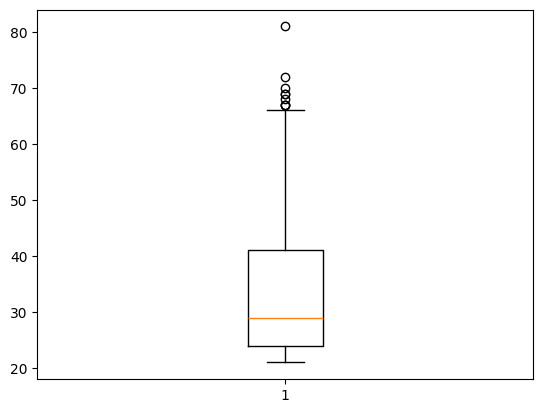

In [14]:
# checking outliers using boxplot
plt.boxplot(data['Age'])
plt.show()


In [15]:
#eliminating outliers above 70 based on least possibility
data = data[data['Age'] < 70]

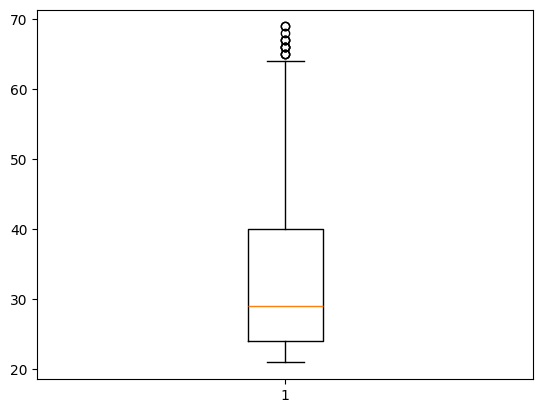

In [16]:
# checking outliers using boxplot
plt.boxplot(data['Age'])
plt.show()


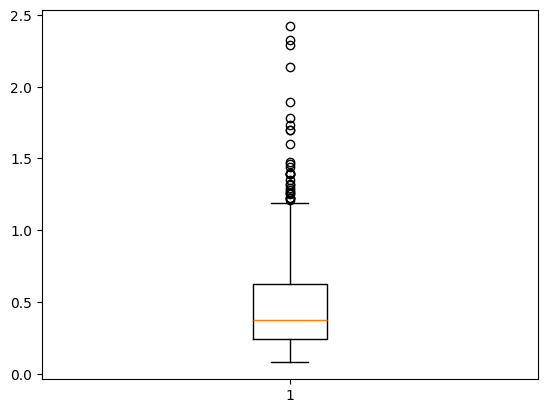

In [17]:
# checking outliers using boxplot
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()


In [18]:
#diabetes pedegreefunction has great significance so that elimination of outliers may worsen the prediction

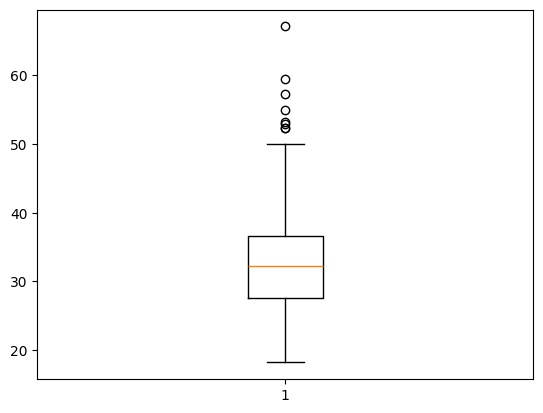

In [19]:
# checking outliers using boxplot
plt.boxplot(data['BMI'])
plt.show()


In [20]:
#eliminating outliers above 60
data = data[data['BMI'] < 60]

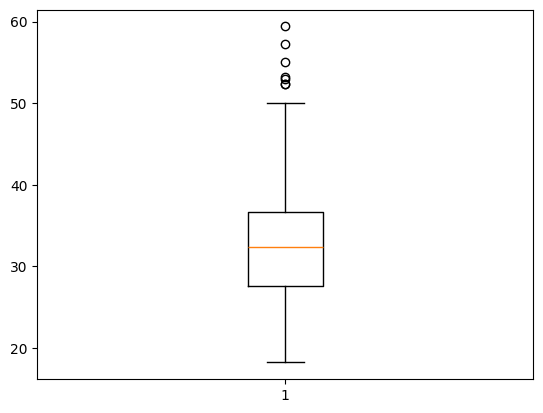

In [21]:
# checking outliers using boxplot
plt.boxplot(data['BMI'])
plt.show()


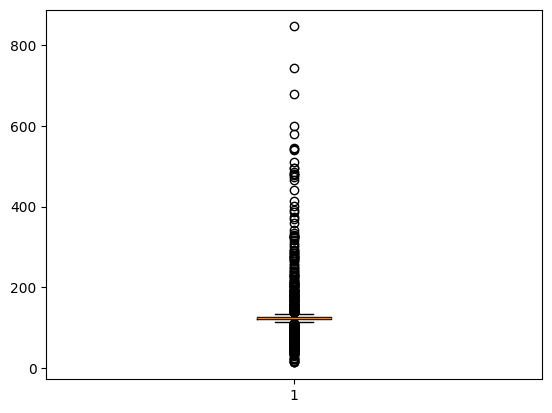

In [22]:
# checking outliers using boxplot
plt.boxplot(data['Insulin'])
plt.show()


In [23]:
# insulin is a significant data so that keeping outliers as same.

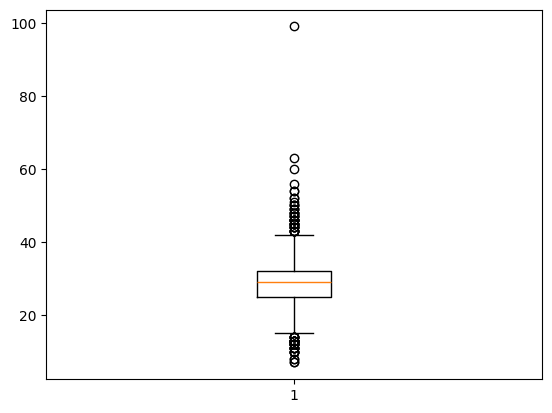

In [24]:
# checking outliers using boxplot
plt.boxplot(data['SkinThickness'])
plt.show()


In [25]:
#outliers above 60 only eliminating
data = data[data['SkinThickness'] < 60]

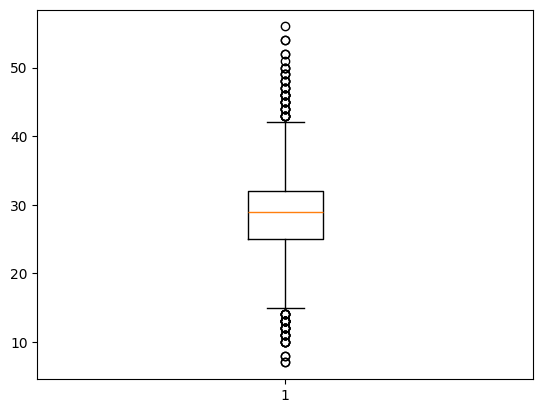

In [26]:
# checking outliers using boxplot
plt.boxplot(data['SkinThickness'])
plt.show()


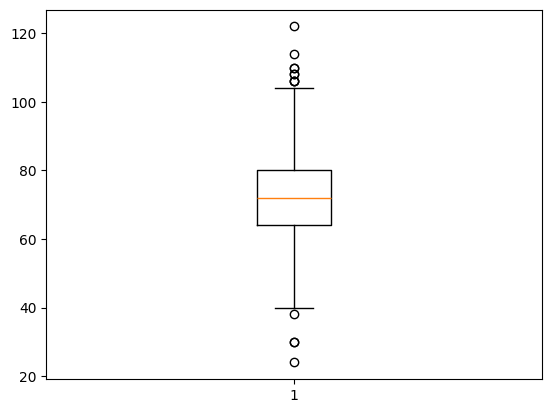

In [27]:
# checking outliers using boxplot
plt.boxplot(data['BloodPressure'])
plt.show()


In [28]:
#not removing outliers of BP because considering as a sensitive biological data

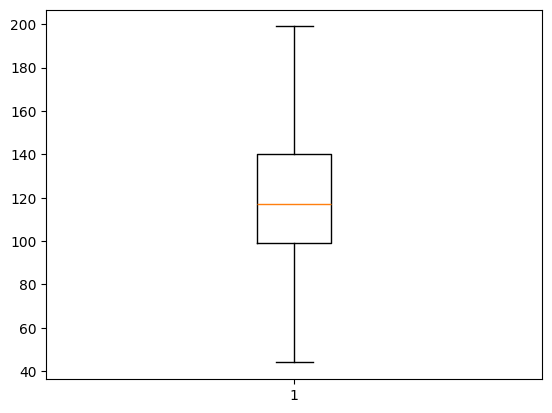

In [29]:
# checking outliers using boxplot
plt.boxplot(data['Glucose'])
plt.show()


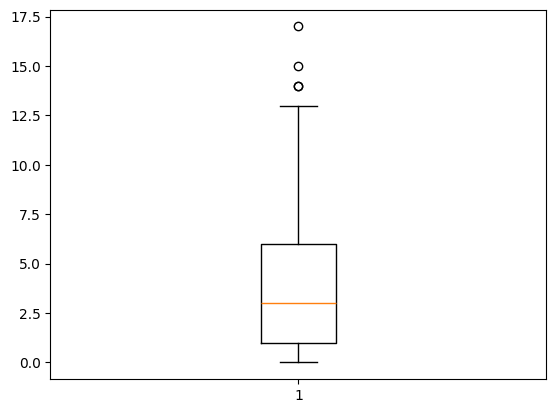

In [30]:
# checking outliers using boxplot
plt.boxplot(data['Pregnancies'])
plt.show()


In [31]:
#considering outliers too
# no need of encoding now not doing scaling also.

Splitting of data

In [32]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [33]:
#splitting of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = log.predict(x_test)

In [36]:
y_test

,Outcome
398,0
326,1
98,0
506,1
110,1
...,...
617,0
249,0
313,0
335,0


In [37]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
398,3,82.0,70.0,29.0,125.0,21.1,0.389,25
326,1,122.0,64.0,32.0,156.0,35.1,0.692,30
98,6,93.0,50.0,30.0,64.0,28.7,0.356,23
506,0,180.0,90.0,26.0,90.0,36.5,0.314,35
110,3,171.0,72.0,33.0,135.0,33.3,0.199,24
...,...,...,...,...,...,...,...,...
617,2,68.0,62.0,13.0,15.0,20.1,0.257,23
249,1,111.0,86.0,19.0,125.0,30.1,0.143,23
313,3,113.0,50.0,10.0,85.0,29.5,0.626,25
335,0,165.0,76.0,43.0,255.0,47.9,0.259,26


In [38]:
#predicted outcome
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)

In [40]:
confusion_matrix(y_test,y_pred)

array([[98,  9],
       [18, 28]])

In [41]:
#27 wrong values then checking accuracy


In [42]:
print('accuracy_score = ' ,accuracy_score(y_test,y_pred))


accuracy_score =  0.8235294117647058


In [43]:
#logistic regression using standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [44]:
model1 = LogisticRegression()
model1.fit(x_train_sc,y_train)

LogisticRegression()

In [45]:
y_pred_sc = model1.predict(x_test_sc)

In [46]:
confusion_matrix(y_test,y_pred_sc)


array([[93, 14],
       [14, 32]])

In [47]:
accuracy_score(y_test,y_pred_sc)

0.8169934640522876

In [48]:
#after scaling in logistic regression 28 wrong predictions and 81.6 accuracy

KNN MODEL

In [49]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(x_train,y_train)

In [50]:
metrik_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)

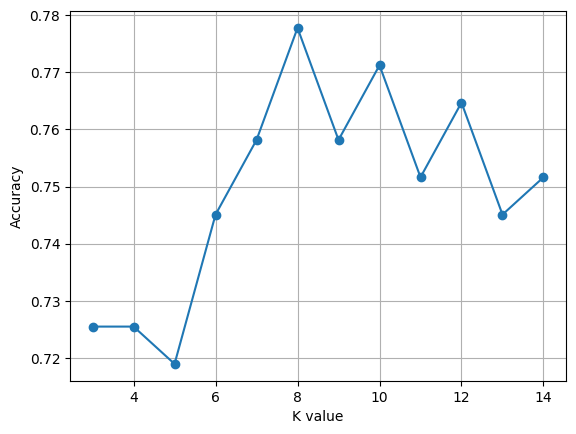

In [51]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [52]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [53]:
y_pred_knn = classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7777777777777778

In [54]:
metrik_k

[0.7254901960784313,
 0.7254901960784313,
 0.7189542483660131,
 0.7450980392156863,
 0.7581699346405228,
 0.7777777777777778,
 0.7581699346405228,
 0.7712418300653595,
 0.7516339869281046,
 0.7647058823529411,
 0.7450980392156863,
 0.7516339869281046]

In [55]:
#scaling in knn
metrik_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train_sc,y_train)
  y_pred = classifier.predict(x_test_sc)
  acc = accuracy_score(y_test,y_pred)
  metrik_k.append(acc)

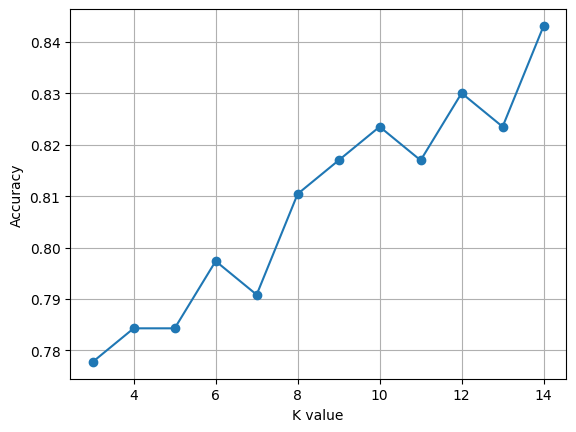

In [56]:
plt.plot(neighbors,metrik_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [57]:
classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=14)

In [58]:
y_pred_knn = classifier.predict(x_test_sc)
accuracy_score(y_test,y_pred_knn)

0.8431372549019608

In [59]:
metrik_k

[0.7777777777777778,
 0.7843137254901961,
 0.7843137254901961,
 0.7973856209150327,
 0.7908496732026143,
 0.8104575163398693,
 0.8169934640522876,
 0.8235294117647058,
 0.8169934640522876,
 0.8300653594771242,
 0.8235294117647058,
 0.8431372549019608]

In [ ]:
#after scaling in knn model accuracy becomes 84.31

SVM MODEL


In [60]:
from sklearn.svm import SVC
sv = SVC()


In [61]:
sv.fit(x_train,y_train)


SVC()

In [62]:
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
accuracy_score(y_test,y_pred_sv)

0.8235294117647058

In [ ]:
#accuracy score obtained in svm model is 82.35

In [63]:
#svm model after standard scaling
sv.fit(x_train_sc,y_train)
y_pred_sv = sv.predict(x_test_sc)
accuracy_score(y_test,y_pred_sv)

0.8300653594771242

In [ ]:
#in svm,after scaling accuracy cbecomes 83

In [73]:
#for polynomial kernel
sv1 = SVC(kernel='poly',degree=3)
sv1.fit(x_train,y_train)
y_pred_sv1 = sv1.predict(x_test)
accuracy_score(y_test,y_pred_sv1)

0.8235294117647058

In [71]:
#polynomial kernel with scaling
sv1.fit(x_train_sc,y_train)
y_pred_sv1 = sv1.predict(x_test_sc)
accuracy_score(y_test,y_pred_sv1)

0.7450980392156863

In [74]:
#linear kernel
sv2 = SVC(kernel='linear')
sv2.fit(x_train,y_train)
y_pred_sv2 = sv2.predict(x_test)
accuracy_score(y_test,y_pred_sv2)

0.8300653594771242

In [75]:
#linear kernel after scaling
sv2.fit(x_train_sc,y_train)
y_pred_sv2 = sv2.predict(x_test_sc)
accuracy_score(y_test,y_pred_sv2)

0.8169934640522876

Gaussian Naive bayes Model


In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
accuracy_score(y_test,y_pred_gnb)

0.7973856209150327

In [80]:
#gnb with scaling
gnb.fit(x_train_sc,y_train)
y_pred_gnb_sc = gnb.predict(x_test_sc)
accuracy_score(y_test,y_pred_gnb_sc)

0.803921568627451

Decision tree Model


In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.6993464052287581

In [79]:
# Decision tree using scaled data
clf.fit(x_train_sc,y_train)
y_pred_dt_sc = clf.predict(x_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.6862745098039216

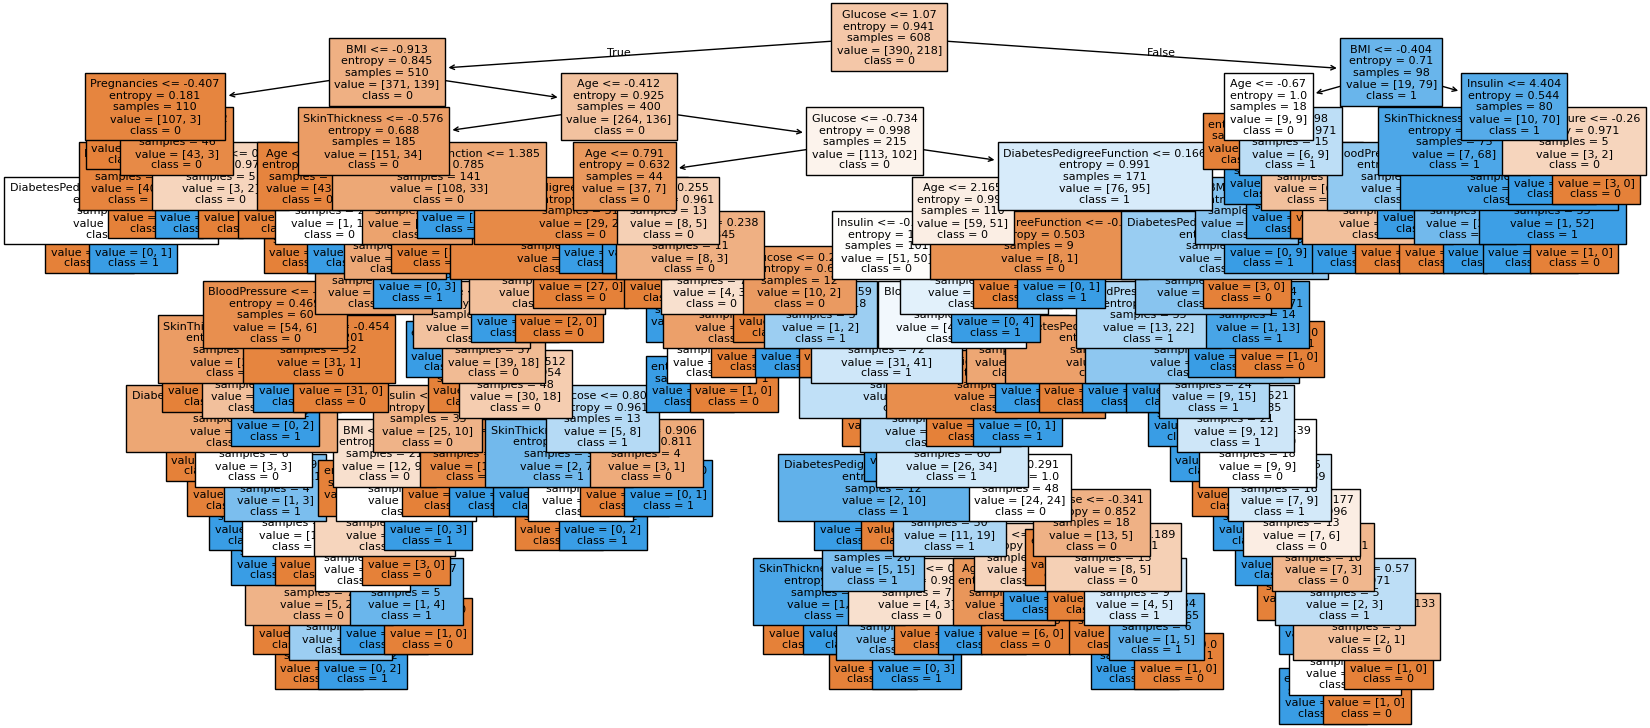

In [81]:
from sklearn import tree
plt.figure(figsize=(20,9))
tree.plot_tree(clf, feature_names = x_train.columns,
               class_names = clf.classes_.astype('str'),
               filled = True,
               fontsize=8)
plt.show()

KNN Model after standard scaling shows 84.3 accuracy.So that this consider as a best model for this dataset.
